In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

In [3]:
train_data = pd.read_csv("playground-series-s4e7/train.csv")
test_data = pd.read_csv("playground-series-s4e7/test.csv")

In [4]:
print(train_data.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   0    Male   21                1         35.0                   0   
1   1    Male   43                1         28.0                   0   
2   2  Female   25                1         14.0                   1   
3   3  Female   35                1          1.0                   0   
4   4  Female   36                1         15.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    1-2 Year            Yes         65101.0                 124.0      187   
1   > 2 Years            Yes         58911.0                  26.0      288   
2    < 1 Year             No         38043.0                 152.0      254   
3    1-2 Year            Yes          2630.0                 156.0       76   
4    1-2 Year             No         31951.0                 152.0      294   

   Response  
0         0  
1         1  
2         0  
3         0  
4         0  


In [5]:
print(f"Training dataset shape: {train_data.shape}")

Training dataset shape: (11504798, 12)


In [6]:
print(train_data.dtypes)

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


In [7]:
print(f"Number of unique IDs in training data: {train_data.id.nunique()}")

Number of unique IDs in training data: 11504798


In [8]:
train_data.drop(columns=['id'], inplace=True)

In [9]:
print(f"Missing values in training dataset:\n{train_data.isnull().mean()}")

Missing values in training dataset:
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64


In [10]:
for var in train_data.columns:
    print(f"{var}: {train_data[var].unique()[:20]} | {train_data[var].nunique()}\n")

Gender: ['Male' 'Female'] | 2

Age: [21 43 25 35 36 31 23 47 26 66 22 27 24 79 34 20 42 40 50 67] | 66

Driving_License: [1 0] | 2

Region_Code: [35. 28. 14.  1. 15. 47. 45.  8. 11.  3. 10. 12. 37. 50. 30. 46. 29. 16.
 26. 25.] | 54

Previously_Insured: [0 1] | 2

Vehicle_Age: ['1-2 Year' '> 2 Years' '< 1 Year'] | 3

Vehicle_Damage: ['Yes' 'No'] | 2

Annual_Premium: [65101. 58911. 38043.  2630. 31951. 28150. 27128. 40659. 31639. 27996.
 38104. 43746. 23692. 66887. 30226. 36389. 25769. 40797. 29698. 27677.] | 51728

Policy_Sales_Channel: [124.  26. 152. 156. 160.   8.  31. 157.  60. 122.  15.  30. 147.   1.
  63. 136. 154.  18. 135. 151.] | 152

Vintage: [187 288 254  76 294 197 190 262  36 125 215  30 203 259 245 150 240 242
 117 151] | 290

Response: [0 1] | 2



In [11]:
continuous = list(train_data.select_dtypes(exclude="O").columns)[:-1]
categorical = list(train_data.select_dtypes(include="O").columns)

In [12]:
print(f"There are {len(continuous)} continuous variables: {continuous}")
print(f"There are {len(categorical)} categorical variables: {categorical}")

There are 7 continuous variables: ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
There are 3 categorical variables: ['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [13]:
print(train_data[categorical].nunique())

Gender            2
Vehicle_Age       3
Vehicle_Damage    2
dtype: int64


In [1]:
num_cols = len(continuous)
fig, axes = plt.subplots(num_cols, 1, figsize=(10, 4 * num_cols))

for i, col in enumerate(continuous):
    train_data.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

NameError: name 'continuous' is not defined

In [ ]:
train_data[continuous].hist(bins=30, figsize=(15, 15))
plt.show()

In [48]:
X_train = train_data.drop('Response', axis=1)
y_train = train_data['Response']

In [17]:
catboost_classifier = CatBoostClassifier(random_seed=0, verbose=100)
catboost_classifier.fit(X_train, y_train, cat_features=categorical)

Learning rate set to 0.5
0:	learn: 0.2988089	total: 6.77s	remaining: 1h 52m 41s
100:	learn: 0.2539413	total: 7m 10s	remaining: 1h 3m 50s
200:	learn: 0.2523126	total: 14m 5s	remaining: 56m 1s
300:	learn: 0.2515626	total: 20m 53s	remaining: 48m 30s
400:	learn: 0.2511003	total: 27m 43s	remaining: 41m 24s
500:	learn: 0.2507832	total: 35m 7s	remaining: 34m 59s
600:	learn: 0.2505132	total: 44m 6s	remaining: 29m 16s
700:	learn: 0.2502624	total: 51m 47s	remaining: 22m 5s
800:	learn: 0.2500678	total: 58m 58s	remaining: 14m 39s
900:	learn: 0.2498783	total: 1h 6m 3s	remaining: 7m 15s
999:	learn: 0.2497081	total: 1h 12m 57s	remaining: 0us


In [49]:
test_ids = test_data['id']
test_data.drop(columns=['id'], inplace=True)

In [50]:
mappings_list = [{'Male': 0, 'Female': 1}, {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}, {'Yes': 1, 'No': 0}]
test_data["Gender"] = test_data["Gender"].map(mappings_list[0])
test_data["Vehicle_Age"] = test_data["Vehicle_Age"].map(mappings_list[1])
test_data["Vehicle_Damage"] = test_data["Vehicle_Damage"].map(mappings_list[2])

In [51]:
predictions_test = catboost_classifier.predict_proba(test_data)[:, 1]

In [52]:
result = pd.DataFrame({'id': test_ids, 'Response': predictions_test.flatten()}, columns=['id', 'Response'])
result.to_csv("playground-series-s4e7/submission_2.csv", index=False)

In [22]:
X_train_preds = catboost_classifier.predict_proba(X_train)[:, 1]
print('Train set')
print('catboost roc-auc: {:.4f}'.format(roc_auc_score(y_train, X_train_preds)))

Train set
catboost roc-auc: 0.8824


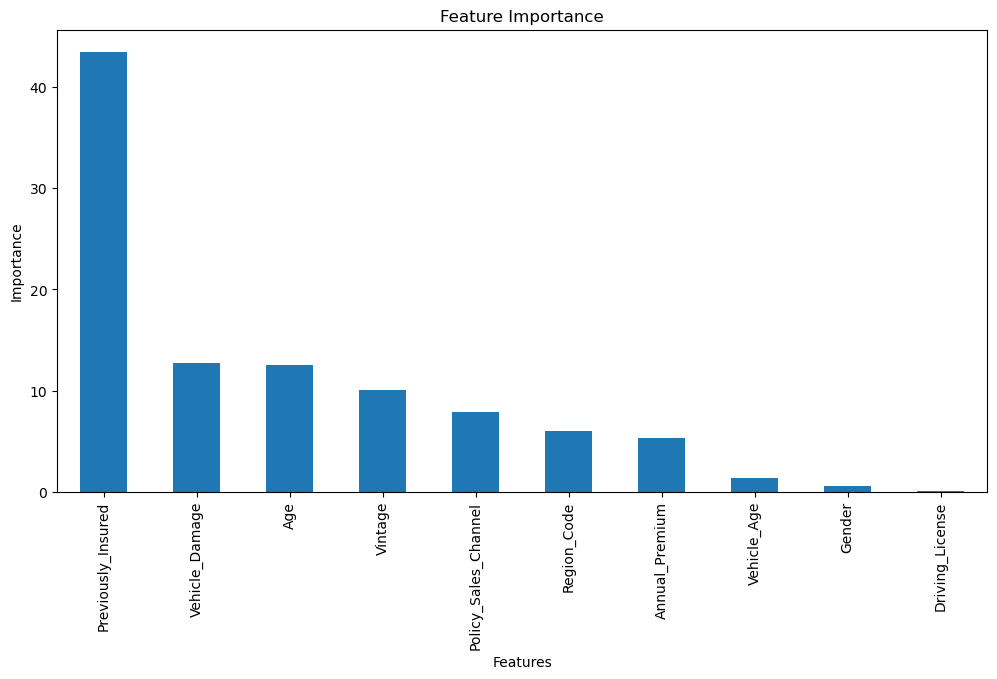

In [23]:
importance = pd.Series(catboost_classifier.feature_importances_, index=X_train.columns)
importance.sort_values(ascending=False).plot.bar(figsize=(12, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [24]:
from xgboost import XGBClassifier

In [54]:
mappings_list = [{'Male': 0, 'Female': 1}, {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}, {'Yes': 1, 'No': 0}]
X_train["Gender"] = X_train["Gender"].map(mappings_list[0])
X_train["Vehicle_Age"] = X_train["Vehicle_Age"].map(mappings_list[1])
X_train["Vehicle_Damage"] = X_train["Vehicle_Damage"].map(mappings_list[2])

test_data["Gender"] = test_data["Gender"].map(mappings_list[0])
test_data["Vehicle_Age"] = test_data["Vehicle_Age"].map(mappings_list[1])
test_data["Vehicle_Damage"] = test_data["Vehicle_Damage"].map(mappings_list[2])

In [28]:
categorical = list(X_train.select_dtypes(include="O").columns)

In [31]:
xgboost_classifier = XGBClassifier(random_state=0, use_label_encoder=False)
xgboost_classifier.fit(X_train, y_train)

[20:04:50] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [53]:
predictions_test_catboost = catboost_classifier.predict_proba(test_data)[:, 1]

In [55]:
predictions_test_xgboost = xgboost_classifier.predict_proba(test_data)[:, 1]

In [66]:
ensemble_predictions = (0.0 * predictions_test_catboost) + (1 * predictions_test_xgboost)

In [67]:
result = pd.DataFrame({'id': test_ids, 'Response': ensemble_predictions.flatten()}, columns=['id', 'Response'])
result.to_csv("playground-series-s4e7/submission5.csv", index=False)

In [68]:
X_train_preds_catboost = catboost_classifier.predict_proba(X_train)[:, 1]
print('Train set (CatBoost)')
print('catboost roc-auc: {:.4f}'.format(roc_auc_score(y_train, X_train_preds_catboost)))

Train set (CatBoost)
catboost roc-auc: 0.8269


In [69]:
X_train_preds_xgboost = xgboost_classifier.predict_proba(X_train)[:, 1]
print('Train set (XGBoost)')
print('xgboost roc-auc: {:.4f}'.format(roc_auc_score(y_train, X_train_preds_xgboost)))


Train set (XGBoost)
xgboost roc-auc: 0.8722


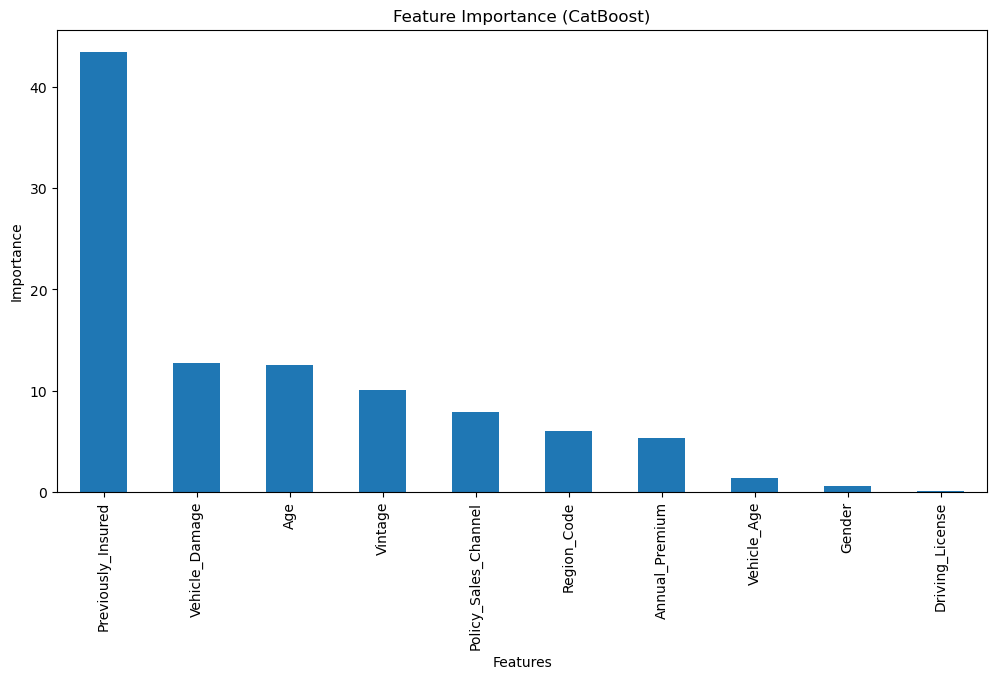

In [61]:
importance_catboost = pd.Series(catboost_classifier.feature_importances_, index=X_train.columns)
importance_catboost.sort_values(ascending=False).plot.bar(figsize=(12, 6))
plt.title('Feature Importance (CatBoost)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


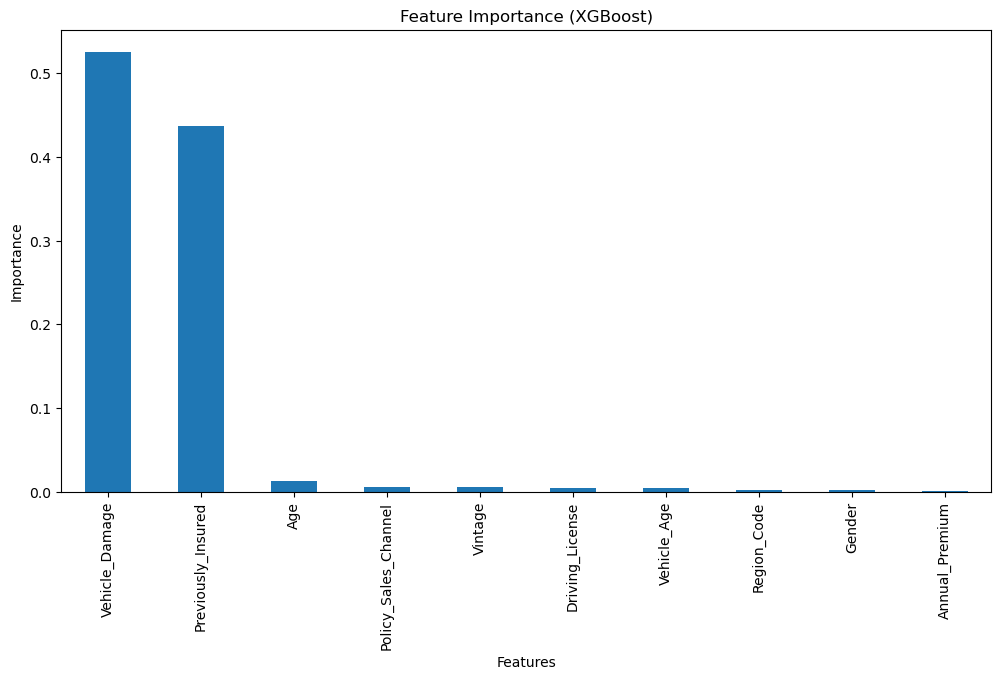

In [62]:
importance_xgboost = pd.Series(xgboost_classifier.feature_importances_, index=X_train.columns)
importance_xgboost.sort_values(ascending=False).plot.bar(figsize=(12, 6))
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

C:\Users\nickn\AppData\Local\anaconda3\envs\niyath37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nickn\AppData\Local\anaconda3\envs\niyath37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\nickn\AppData\Local\anaconda3\envs\niyath37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
